# Task 1- Prediction using Supervised ML

# To Predict the percentage of an student based on the no. of study hours.
# Author: Mohd Musharaf.A.Shaikh

Step 1 :Importing Libraries and Understanding Data

In [43]:
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
import seaborn as sns
import sklearn #This lib contains all the models
import statsmodels.api as sm #will help to display data in the form of statistics

%matplotlib inline
from IPython.display import HTML
from matplotlib import animation
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from sklearn.linear_model import LinearRegression

In [44]:
#Importing data from remote link

url = "http://bit.ly/w-data"
data = pd.read_csv(url)
print("Data imported successfully")

data.head(10)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [45]:
# Looking at the last five rows
data.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


Lets check the Data type & Summary of the Data

In [46]:
print(data.shape)
print(data.describe())
print(data.info())

(25, 2)
           Hours     Scores
count  25.000000  25.000000
mean    5.012000  51.480000
std     2.525094  25.286887
min     1.100000  17.000000
25%     2.700000  30.000000
50%     4.800000  47.000000
75%     7.400000  75.000000
max     9.200000  95.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes
None


Step 2: Visualising Data

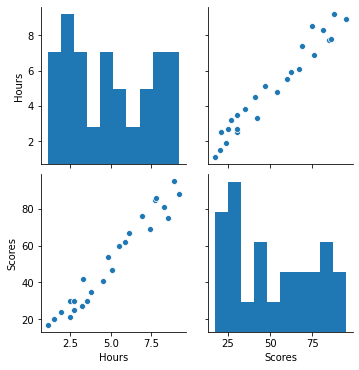

In [47]:
# Let's plot a pair plot of all numerical variables in our dataframe
sns.pairplot(data)

C:\Users\Mush\anaconda3\lib\site-packages\seaborn\axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


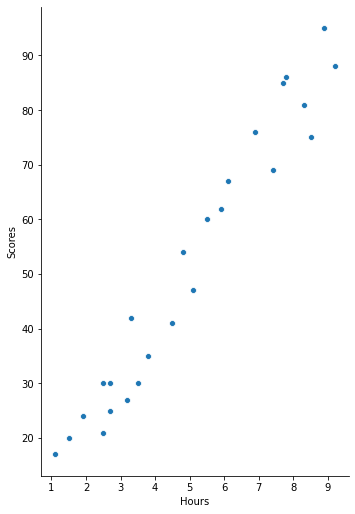

In [48]:
# Visualise the relationship between the features and the response using scatterplots
sns.pairplot(data, x_vars=['Hours'], y_vars='Scores',
             size=7, aspect=0.7, kind='scatter')

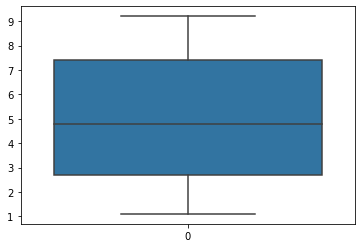

In [49]:
sns.boxplot(data=data["Hours"])

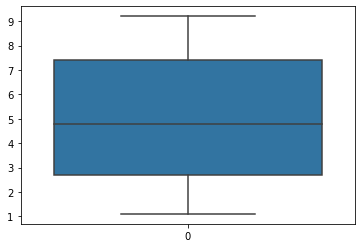

In [50]:
sns.boxplot(data=data["Hours"])

Step 3 : Splitting the data in Training and Test set

The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [51]:
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values  

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.7, random_state=0) 

Step 4 : Performing Linear Regression

In [53]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

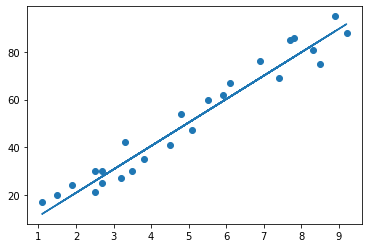

In [54]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

Here we have plotted the data using the previously trained test data

Step 5 : Predictions

In [55]:
# Making predictions using the model
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]
 [3.8]
 [1.9]
 [7.8]
 [6.9]
 [1.1]
 [5.1]
 [7.7]
 [3.3]
 [8.3]
 [9.2]
 [6.1]
 [3.5]
 [2.7]]


In [56]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,15.869899
1,27,32.611468
2,69,73.972991
3,30,25.717881
4,62,59.201018
5,35,38.520257
6,24,19.809092
7,86,77.912184
8,76,69.049000
9,17,11.930706


What will be predicted score if a student studies for 9.25 hrs/ day?

In [57]:
hours = [[9.25]]
own_pred = regressor.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [[9.25]]
Predicted Score = 92.19175706589918


Step 6: Evaluating the model

In [58]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

In [59]:
from math import sqrt
rmse = sqrt(mse)

In [60]:
from sklearn import metrics  
print('Mean_Squared_Error :' ,mse)
print('Root_Mean_Squared_Error :' ,rmse)
print('r_square_value :',r_squared)
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean_Squared_Error : 28.474750355381573
Root_Mean_Squared_Error : 5.336173756108544
r_square_value : 0.9546671754868552
Mean Absolute Error: 5.001787485958392


In the last step here we have evaluated the performance of the Model/Algorithm by Metrics such as Mean_Square_Error,Root_Mean_Square_Error,R_square,Mean_Absolute_Error